<a href="https://colab.research.google.com/github/HMRLKE/probe_wrapper/blob/main/Barcharts_deptree_perturbation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [6]:
%cd drive/MyDrive/deptree
%ls


/content/drive/MyDrive/deptree
Barcharts_deptree_perturbation.ipynb  extended_stats.tsv  ssh_inference_accuracy.tsv


In [11]:
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_d

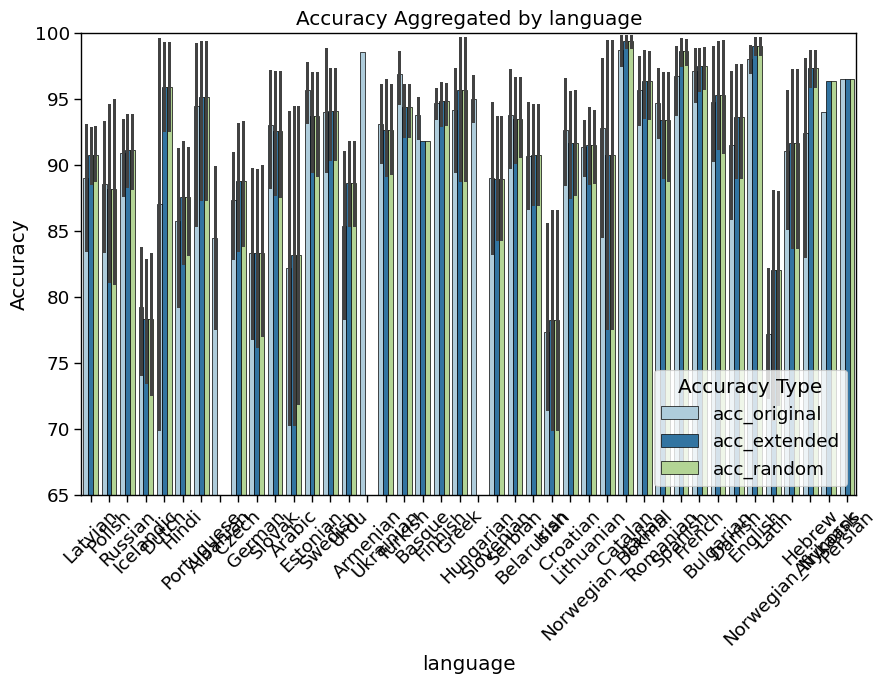

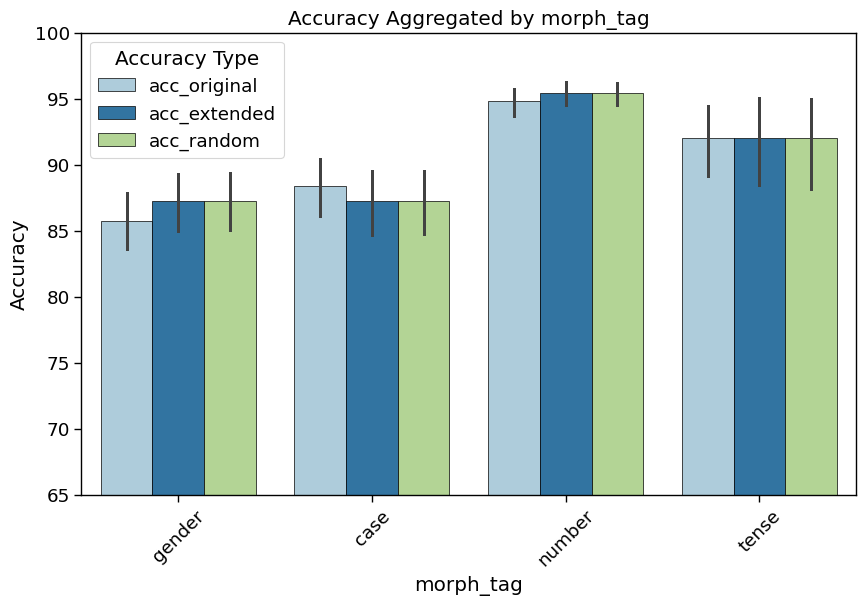

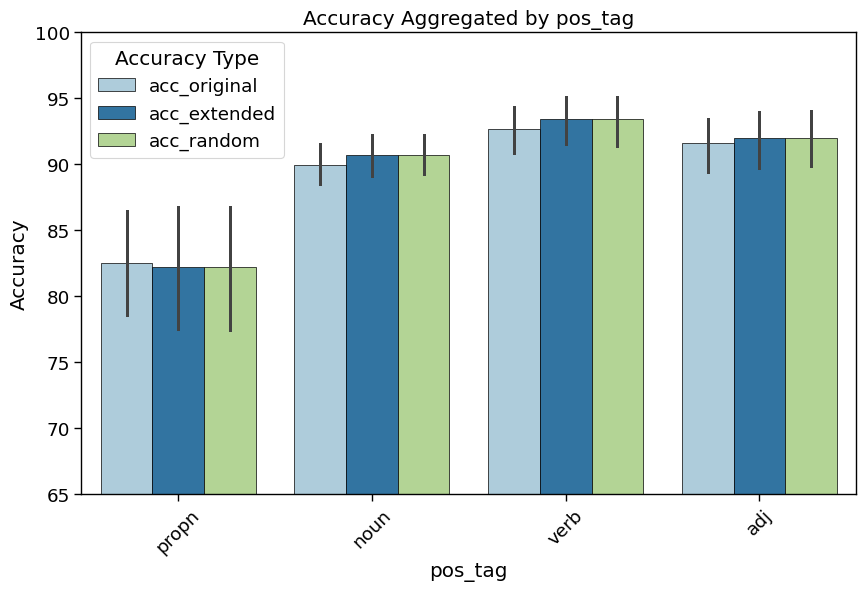

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from collections import defaultdict
import seaborn as sns

#sns.set_palette(sns.color_palette("Set2")[::2])
#with sns.set_context("paper", font_scale=1.5):

heatmap_cmap = "GnBu"

barplot_kws = dict(linewidth=0.5, edgecolor="black", palette="Paired")
bar_4x4_kwargs = barplot_kws.copy()
bar_4x4_kwargs['ci'] = 'sd'
bar_4x4_kwargs['capsize'] = 0.11

df = pd.read_csv('ssh_inference_accuracy.tsv', sep='\t')
aggregations = ['language', 'morph_tag', 'pos_tag']

for aggregation in aggregations:
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(x=aggregation, y="value", hue="variable", data=pd.melt(df, id_vars=[aggregation], value_vars=['acc_original', 'acc_extended', 'acc_random']),**barplot_kws,)
  ax.set_xlabel(aggregation)
  ax.set_ylabel('Accuracy')
  ax.set_ylim(65, 100)
  ax.set_title(f'Accuracy Aggregated by {aggregation}')
  ax.legend(title="Accuracy Type")
  plt.xticks(rotation=45)
  plt.show()


#Deptree relations in the dataset

In [57]:
import pandas as pd

# Load your data from the input file (replace 'extended_stats.tsv' with your actual file)
with open('extended_stats.tsv', 'r') as f:
    lines = f.readlines()

# Initialize an empty list to store processed data
processed_data = []

# Initialize a set to store unique dependency types
unique_dependency_types = set()

# Iterate through the lines and split into columns
for line in lines:
    parts = line.strip().split('\t')
    language, pos, file = parts[0], parts[1], parts[2]
    dependencies = parts[3:]

    # Add dependency types to the set
    for dependency in dependencies:
        tag, _ = dependency.split('_')
        unique_dependency_types.add(tag)

    # Append the language, pos, file, and original dependencies to the processed data

# Create a list of unique dependency types (without counts) from the set
dependency_types_list = list(unique_dependency_types)
simple_tags = []
for element in dependency_types_list:
  listed = element.split(":")
  tag = listed[0]
  simple_tags.append(tag)
simple_tags = list(set(simple_tags))
print(dependency_types_list)
print(simple_tags)
# Create the header for the new fixed TSV
header = ['Language', 'POS', 'File'] + dependency_types_list

# Update the DataFrame columns with the new header

df = pd.DataFrame(columns = header)



['nmod:gobj', 'dislocated:csubj', 'obl', 'compound:redup', 'iobj', 'ccomp:relcl', 'obl:pmod', 'reparandum', 'nmod:npmod', 'det', 'acl:cleft', 'advmod', 'obl:cmpr', 'flat:repeat', 'obj:lvc', 'compound:smixut', 'compound', 'nummod:entity', 'dep:comp', 'obl:tmod', 'conj:expl', 'vocative', 'ccomp:cleft', 'clf', 'nmod:part', 'advcl:cmpr', 'nsubj:cop', 'advcl:cleft', 'advcl:cmp', 'parataxis:obj', 'csubj:cleft', 'nsubj:caus', 'ccomp:obj', 'nmod:flat', 'xcomp:pred', 'parataxis:rel', 'compound:nn', 'csubj:relcl', 'nummod:gov', 'flat:title', 'compound:svc', 'mark', 'parataxis', 'ccomp:pmod', 'xcomp:ds', 'parataxis:nsubj', 'flat:foreign', 'fixed', 'conj:svc', 'advcl', 'flat', 'advcl:relcl', 'nmod:gsubj', 'conj', 'nmod', 'compound:lvc', 'vocative:cl', 'iobj:agent', 'obl:arg', 'nsubj:outer', 'xcomp', 'nmod:arg', 'obl:agent', 'flat:name', 'advcl:svc', 'amod', 'list', 'flat:abs', 'obj:agent', 'acl:relcl', 'advmod:emph', 'flat:range', 'csubj', 'advcl:tcl', 'csubj:cop', 'obj', 'acl', 'advcl:abs', 'para

In [52]:
import pandas as pd

# Load your data from the input file
with open('extended_stats.tsv', 'r') as f:
    lines = f.readlines()

# Initialize a set to store unique dependency types
unique_dependency_types = set()

# Iterate through the lines and split into columns
for line in lines:
    parts = line.strip().split('\t')
    language, pos, file = parts[0], parts[1], parts[2]
    dependencies = parts[3:]

    # Add dependency types to the set and remove counts
    dependency_types = set()
    for dependency in dependencies:
        tag, count = dependency.split('_')
        dependency_types.add(tag)


# Create the header for the new fixed TSV dynamically
header = ['Language', 'POS', 'File'] + dependency_types_list
with open('extended_stats.tsv', 'r') as f:
    lines2 = f.readlines()
# Initialize an empty list to store rows for the new DataFrame
rows = []

# Iterate through the processed data and fill the DataFrame with counts
for line in lines2:
    parts = line.strip().split('\t')
    language, pos, file = parts[0], parts[1], parts[2]
    dependencies = parts[3:]
    row_dict = {col: 0 for col in header}
    for dep_type in dependency_types:
        count = sum(1 for dependency in dependencies if dep_type in dependency)
        row_dict[dep_type] = count
        rowlist = [*row_dict.values()]
        #print(rowlist)
    rows.append(rowlist)


# Create a DataFrame with the dynamically generated header
df = pd.DataFrame(rows, columns=header)
print(df)
# Save the fixed DataFrame to a new TSV file (replace 'fixed_data.tsv' with your desired output file name)
df.to_csv('fixed_data.tsv', sep='\t', index=False)


     Language  POS  File  nmod:gobj  dislocated:csubj  obl  compound:redup  \
0           0    0     0          0                 0    1               0   
1           0    0     0          0                 0    1               0   
2           0    0     0          0                 0    1               0   
3           0    0     0          0                 0    2               0   
4           0    0     0          0                 0    2               0   
..        ...  ...   ...        ...               ...  ...             ...   
703         0    0     0          0                 0    1               0   
704         0    0     0          0                 0    1               0   
705         0    0     0          0                 0    1               0   
706         0    0     0          0                 0    1               0   
707         0    0     0          0                 0    1               0   

     iobj  ccomp:relcl  obl:pmod  ...  orphan  compound:prt  cc

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your fixed data from the TSV file (replace 'fixed_data.tsv' with your actual file)
df = pd.read_csv('fixed_data.tsv', sep='\t')

# Extract dependency types columns
dependency_columns = df.columns[3:]
print(df)
# Calculate overall counts of each dependency type
overall_counts = df[dependency_columns].sum()
print(overall_counts)

# Create a bar chart for overall dependency type counts
plt.figure(figsize=(12, 6))
sns.barplot(x=overall_counts.index, y=overall_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Dependency Types')
plt.ylabel('Count')
plt.title('Overall Dependency Type Counts')
plt.tight_layout()
plt.show()

# Create bar charts for dependency type counts per language
for language in df['Language'].unique():
    language_df = df[df['Language'] == language]
    language_counts = language_df[dependency_columns].sum()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=language_counts.index, y=language_counts.values)
    plt.xticks(rotation=90)
    plt.xlabel('Dependency Types')
    plt.ylabel('Count')
    plt.title(f'Dependency Type Counts for {language}')
    plt.tight_layout()
    plt.show()


             0            1          2  \
0    Afrikaans  number_noun    dev.tsv   
1    Afrikaans  number_noun   test.tsv   
2    Afrikaans  number_noun  train.tsv   
3       Arabic     case_adj    dev.tsv   
4       Arabic     case_adj   test.tsv   
..         ...          ...        ...   
703       Urdu  gender_noun   test.tsv   
704       Urdu  gender_noun  train.tsv   
705       Urdu  number_noun    dev.tsv   
706       Urdu  number_noun   test.tsv   
707       Urdu  number_noun  train.tsv   

                                                     3  
0    {'obj': 141, 'nmod': 134, 'nsubj': 72, 'conj':...  
1    {'obj': 157, 'nsubj': 66, 'obl': 129, 'nmod': ...  
2    {'nsubj:pass': 121, 'nmod': 1186, 'obl': 906, ...  
3    {'amod': 444, 'ccomp': 5, 'obl': 22, 'xcomp': ...  
4    {'xcomp': 14, 'amod': 471, 'advmod:emph': 2, '...  
..                                                 ...  
703  {'nsubj': 75, 'obl': 211, 'obj': 144, 'nmod': ...  
704  {'nmod': 1929, 'obl': 1848, 'conj'

TypeError: ignored

<Figure size 1200x600 with 0 Axes>